In [1]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import keras; import keras.backend
if keras.backend.backend() != 'tensorflow':
    raise BaseException("This script uses other backend")
else:
    keras.backend.set_image_dim_ordering('th')
    print("Backend ok")

Using TensorFlow backend.


Backend ok


In [2]:
from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords

In [3]:
def load_doc(filename):
    file = open(filename, 'r')
    text = file.read()
    file.close()
    return text

In [4]:
def clean_doc(doc):
    tokens = doc.split()
    table = str.maketrans('', '', punctuation)
    tokens = [w.translate(table) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

In [5]:
def add_doc_to_vocab(filename, vocab):
    doc = load_doc(filename)
    tokens = clean_doc(doc)
    vocab.update(tokens)

In [6]:
def process_docs(directory, vocab, is_trian):
    lines = list()
    for filename in listdir(directory):
        if is_trian and filename.startswith('cv9'):
            continue
        if not is_trian and not filename.startswith('cv9'):
            continue
        path = directory + '/' + filename
        line = doc_to_line(path, vocab)
        lines.append(line)
    return lines

In [7]:
def doc_to_line(filename, vocab):
    doc = load_doc(filename)
    tokens = clean_doc(doc)
    tokens = [w for w in tokens if w in vocab]
    return ' '.join(tokens)

In [8]:
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)

positive_lines = process_docs('txt_sentoken/pos', vocab, True)
negative_lines = process_docs('txt_sentoken/neg', vocab, True)

In [9]:
from keras.preprocessing.text import Tokenizer
from numpy import array

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [11]:
def prepare_data(train_docs, test_docs, mode):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(train_docs)
    Xtrain = tokenizer.texts_to_matrix(train_docs, mode=mode)
    Xtest = tokenizer.texts_to_matrix(test_docs, mode=mode)
    return Xtrain, Xtest

In [12]:
def evaluate_mode(Xtrain, ytrain, Xtest, ytest):
    scores = list()
    n_repeats = 30
    n_words = Xtest.shape[1]
    for i in range(n_repeats):
        model = Sequential()
        model.add(Dense(50, input_shape=(n_words,), activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        model.fit(Xtrain, ytrain, epochs=50, verbose=2)
        loss, acc = model.evaluate(Xtest, ytest, verbose=0)
        scores.append(acc)
        print('%d accuracy: %s' % ((i+1), acc))
    return scores

In [13]:
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)

positive_lines = process_docs('txt_sentoken/pos', vocab, True)
negative_lines = process_docs('txt_sentoken/neg', vocab, True)
train_docs = negative_lines + positive_lines

positive_lines = process_docs('txt_sentoken/pos', vocab, False)
negative_lines = process_docs('txt_sentoken/neg', vocab, False)
test_docs = negative_lines + positive_lines

ytrain = array([0 for _ in range(900)] + [1 for _ in range(900)])
ytest = array([0 for _ in range(100)] + [1 for _ in range(100)])

In [14]:
from pandas import DataFrame

In [15]:
modes = ['binary', 'count', 'tfidf', 'freq']
results = DataFrame()
for mode in modes:
	# prepare data for mode
	Xtrain, Xtest = prepare_data(train_docs, test_docs, mode)
	# evaluate model on data for mode
	results[mode] = evaluate_mode(Xtrain, ytrain, Xtest, ytest)
# summarize results
print(results.describe())
# plot results
#results.boxplot()
#pyplot.show()

Epoch 1/50
 - 2s - loss: 0.4765 - acc: 0.7811
Epoch 2/50
 - 2s - loss: 0.0560 - acc: 0.9961
Epoch 3/50
 - 2s - loss: 0.0158 - acc: 1.0000
Epoch 4/50
 - 2s - loss: 0.0071 - acc: 1.0000
Epoch 5/50
 - 2s - loss: 0.0039 - acc: 1.0000
Epoch 6/50
 - 2s - loss: 0.0024 - acc: 1.0000
Epoch 7/50
 - 2s - loss: 0.0016 - acc: 1.0000
Epoch 8/50
 - 2s - loss: 0.0011 - acc: 1.0000
Epoch 9/50
 - 2s - loss: 8.3045e-04 - acc: 1.0000
Epoch 10/50
 - 2s - loss: 6.3620e-04 - acc: 1.0000
Epoch 11/50
 - 2s - loss: 5.0356e-04 - acc: 1.0000
Epoch 12/50
 - 3s - loss: 4.0927e-04 - acc: 1.0000
Epoch 13/50
 - 3s - loss: 3.3827e-04 - acc: 1.0000
Epoch 14/50
 - 2s - loss: 2.8537e-04 - acc: 1.0000
Epoch 15/50
 - 2s - loss: 2.4254e-04 - acc: 1.0000
Epoch 16/50
 - 2s - loss: 2.0924e-04 - acc: 1.0000
Epoch 17/50
 - 2s - loss: 1.8170e-04 - acc: 1.0000
Epoch 18/50
 - 2s - loss: 1.5938e-04 - acc: 1.0000
Epoch 19/50
 - 2s - loss: 1.4059e-04 - acc: 1.0000
Epoch 20/50
 - 2s - loss: 1.2504e-04 - acc: 1.0000
Epoch 21/50
 - 2s - l

Epoch 14/50
 - 3s - loss: 2.3538e-04 - acc: 1.0000
Epoch 15/50
 - 2s - loss: 1.9764e-04 - acc: 1.0000
Epoch 16/50
 - 2s - loss: 1.6232e-04 - acc: 1.0000
Epoch 17/50
 - 2s - loss: 1.3635e-04 - acc: 1.0000
Epoch 18/50
 - 2s - loss: 1.1515e-04 - acc: 1.0000
Epoch 19/50
 - 2s - loss: 9.9199e-05 - acc: 1.0000
Epoch 20/50
 - 2s - loss: 8.6042e-05 - acc: 1.0000
Epoch 21/50
 - 2s - loss: 7.5925e-05 - acc: 1.0000
Epoch 22/50
 - 2s - loss: 6.6473e-05 - acc: 1.0000
Epoch 23/50
 - 2s - loss: 5.8933e-05 - acc: 1.0000
Epoch 24/50
 - 2s - loss: 5.2882e-05 - acc: 1.0000
Epoch 25/50
 - 2s - loss: 4.7262e-05 - acc: 1.0000
Epoch 26/50
 - 2s - loss: 4.2522e-05 - acc: 1.0000
Epoch 27/50
 - 2s - loss: 3.9022e-05 - acc: 1.0000
Epoch 28/50
 - 2s - loss: 3.5039e-05 - acc: 1.0000
Epoch 29/50
 - 2s - loss: 3.1992e-05 - acc: 1.0000
Epoch 30/50
 - 2s - loss: 2.9219e-05 - acc: 1.0000
Epoch 31/50
 - 2s - loss: 2.6762e-05 - acc: 1.0000
Epoch 32/50
 - 2s - loss: 2.4642e-05 - acc: 1.0000
Epoch 33/50
 - 2s - loss: 2.272

Epoch 26/50
 - 2s - loss: 6.1960e-05 - acc: 1.0000
Epoch 27/50
 - 2s - loss: 5.6769e-05 - acc: 1.0000
Epoch 28/50
 - 2s - loss: 5.2407e-05 - acc: 1.0000
Epoch 29/50
 - 2s - loss: 4.8433e-05 - acc: 1.0000
Epoch 30/50
 - 2s - loss: 4.5113e-05 - acc: 1.0000
Epoch 31/50
 - 2s - loss: 4.1608e-05 - acc: 1.0000
Epoch 32/50
 - 2s - loss: 3.8743e-05 - acc: 1.0000
Epoch 33/50
 - 2s - loss: 3.6122e-05 - acc: 1.0000
Epoch 34/50
 - 2s - loss: 3.3781e-05 - acc: 1.0000
Epoch 35/50
 - 2s - loss: 3.1570e-05 - acc: 1.0000
Epoch 36/50
 - 2s - loss: 2.9607e-05 - acc: 1.0000
Epoch 37/50
 - 2s - loss: 2.7785e-05 - acc: 1.0000
Epoch 38/50
 - 2s - loss: 2.6081e-05 - acc: 1.0000
Epoch 39/50
 - 2s - loss: 2.4554e-05 - acc: 1.0000
Epoch 40/50
 - 2s - loss: 2.3129e-05 - acc: 1.0000
Epoch 41/50
 - 2s - loss: 2.1833e-05 - acc: 1.0000
Epoch 42/50
 - 2s - loss: 2.0608e-05 - acc: 1.0000
Epoch 43/50
 - 2s - loss: 1.9486e-05 - acc: 1.0000
Epoch 44/50
 - 2s - loss: 1.8458e-05 - acc: 1.0000
Epoch 45/50
 - 2s - loss: 1.746

Epoch 38/50
 - 2s - loss: 3.2380e-05 - acc: 1.0000
Epoch 39/50
 - 2s - loss: 3.0434e-05 - acc: 1.0000
Epoch 40/50
 - 2s - loss: 2.8817e-05 - acc: 1.0000
Epoch 41/50
 - 2s - loss: 2.6963e-05 - acc: 1.0000
Epoch 42/50
 - 2s - loss: 2.5436e-05 - acc: 1.0000
Epoch 43/50
 - 2s - loss: 2.4006e-05 - acc: 1.0000
Epoch 44/50
 - 2s - loss: 2.2673e-05 - acc: 1.0000
Epoch 45/50
 - 2s - loss: 2.1455e-05 - acc: 1.0000
Epoch 46/50
 - 2s - loss: 2.0290e-05 - acc: 1.0000
Epoch 47/50
 - 2s - loss: 1.9359e-05 - acc: 1.0000
Epoch 48/50
 - 2s - loss: 1.8231e-05 - acc: 1.0000
Epoch 49/50
 - 3s - loss: 1.7302e-05 - acc: 1.0000
Epoch 50/50
 - 2s - loss: 1.6427e-05 - acc: 1.0000
10 accuracy: 0.925
Epoch 1/50
 - 3s - loss: 0.4730 - acc: 0.7867
Epoch 2/50
 - 2s - loss: 0.0601 - acc: 0.9928
Epoch 3/50
 - 2s - loss: 0.0150 - acc: 1.0000
Epoch 4/50
 - 2s - loss: 0.0070 - acc: 1.0000
Epoch 5/50
 - 2s - loss: 0.0039 - acc: 1.0000
Epoch 6/50
 - 2s - loss: 0.0022 - acc: 1.0000
Epoch 7/50
 - 2s - loss: 0.0014 - acc: 1.0

Epoch 50/50
 - 2s - loss: 1.1311e-05 - acc: 1.0000
13 accuracy: 0.895
Epoch 1/50
 - 2s - loss: 0.4824 - acc: 0.7656
Epoch 2/50
 - 3s - loss: 0.0671 - acc: 0.9928
Epoch 3/50
 - 3s - loss: 0.0176 - acc: 1.0000
Epoch 4/50
 - 2s - loss: 0.0081 - acc: 1.0000
Epoch 5/50
 - 2s - loss: 0.0046 - acc: 1.0000
Epoch 6/50
 - 2s - loss: 0.0027 - acc: 1.0000
Epoch 7/50
 - 2s - loss: 0.0017 - acc: 1.0000
Epoch 8/50
 - 2s - loss: 0.0012 - acc: 1.0000
Epoch 9/50
 - 2s - loss: 8.5834e-04 - acc: 1.0000
Epoch 10/50
 - 2s - loss: 6.5965e-04 - acc: 1.0000
Epoch 11/50
 - 2s - loss: 5.2256e-04 - acc: 1.0000
Epoch 12/50
 - 2s - loss: 4.2564e-04 - acc: 1.0000
Epoch 13/50
 - 2s - loss: 3.5328e-04 - acc: 1.0000
Epoch 14/50
 - 2s - loss: 2.9840e-04 - acc: 1.0000
Epoch 15/50
 - 2s - loss: 2.5645e-04 - acc: 1.0000
Epoch 16/50
 - 2s - loss: 2.2098e-04 - acc: 1.0000
Epoch 17/50
 - 2s - loss: 1.9299e-04 - acc: 1.0000
Epoch 18/50
 - 2s - loss: 1.7012e-04 - acc: 1.0000
Epoch 19/50
 - 2s - loss: 1.5025e-04 - acc: 1.0000
Ep

Epoch 13/50
 - 3s - loss: 1.6801e-04 - acc: 1.0000
Epoch 14/50
 - 2s - loss: 1.4047e-04 - acc: 1.0000
Epoch 15/50
 - 2s - loss: 1.1947e-04 - acc: 1.0000
Epoch 16/50
 - 2s - loss: 1.0262e-04 - acc: 1.0000
Epoch 17/50
 - 2s - loss: 8.9129e-05 - acc: 1.0000
Epoch 18/50
 - 2s - loss: 7.8095e-05 - acc: 1.0000
Epoch 19/50
 - 2s - loss: 6.9353e-05 - acc: 1.0000
Epoch 20/50
 - 2s - loss: 6.1381e-05 - acc: 1.0000
Epoch 21/50
 - 2s - loss: 5.4834e-05 - acc: 1.0000
Epoch 22/50
 - 2s - loss: 4.9304e-05 - acc: 1.0000
Epoch 23/50
 - 2s - loss: 4.4540e-05 - acc: 1.0000
Epoch 24/50
 - 2s - loss: 4.0548e-05 - acc: 1.0000
Epoch 25/50
 - 2s - loss: 3.6774e-05 - acc: 1.0000
Epoch 26/50
 - 3s - loss: 3.3624e-05 - acc: 1.0000
Epoch 27/50
 - 2s - loss: 3.0804e-05 - acc: 1.0000
Epoch 28/50
 - 2s - loss: 2.8310e-05 - acc: 1.0000
Epoch 29/50
 - 3s - loss: 2.6074e-05 - acc: 1.0000
Epoch 30/50
 - 3s - loss: 2.4080e-05 - acc: 1.0000
Epoch 31/50
 - 3s - loss: 2.2367e-05 - acc: 1.0000
Epoch 32/50
 - 3s - loss: 2.068

Epoch 25/50
 - 2s - loss: 5.2721e-05 - acc: 1.0000
Epoch 26/50
 - 2s - loss: 4.8041e-05 - acc: 1.0000
Epoch 27/50
 - 2s - loss: 4.3889e-05 - acc: 1.0000
Epoch 28/50
 - 2s - loss: 4.0239e-05 - acc: 1.0000
Epoch 29/50
 - 2s - loss: 3.7004e-05 - acc: 1.0000
Epoch 30/50
 - 2s - loss: 3.4134e-05 - acc: 1.0000
Epoch 31/50
 - 2s - loss: 3.1573e-05 - acc: 1.0000
Epoch 32/50
 - 2s - loss: 2.9276e-05 - acc: 1.0000
Epoch 33/50
 - 2s - loss: 2.7198e-05 - acc: 1.0000
Epoch 34/50
 - 2s - loss: 2.5295e-05 - acc: 1.0000
Epoch 35/50
 - 2s - loss: 2.3435e-05 - acc: 1.0000
Epoch 36/50
 - 2s - loss: 2.1847e-05 - acc: 1.0000
Epoch 37/50
 - 2s - loss: 2.0460e-05 - acc: 1.0000
Epoch 38/50
 - 2s - loss: 1.9181e-05 - acc: 1.0000
Epoch 39/50
 - 2s - loss: 1.8043e-05 - acc: 1.0000
Epoch 40/50
 - 2s - loss: 1.6923e-05 - acc: 1.0000
Epoch 41/50
 - 2s - loss: 1.5938e-05 - acc: 1.0000
Epoch 42/50
 - 2s - loss: 1.4994e-05 - acc: 1.0000
Epoch 43/50
 - 2s - loss: 1.4142e-05 - acc: 1.0000
Epoch 44/50
 - 2s - loss: 1.335

Epoch 37/50
 - 2s - loss: 1.6993e-05 - acc: 1.0000
Epoch 38/50
 - 2s - loss: 1.5743e-05 - acc: 1.0000
Epoch 39/50
 - 2s - loss: 1.4628e-05 - acc: 1.0000
Epoch 40/50
 - 2s - loss: 1.3537e-05 - acc: 1.0000
Epoch 41/50
 - 2s - loss: 1.2627e-05 - acc: 1.0000
Epoch 42/50
 - 2s - loss: 1.1850e-05 - acc: 1.0000
Epoch 43/50
 - 2s - loss: 1.1116e-05 - acc: 1.0000
Epoch 44/50
 - 2s - loss: 1.0458e-05 - acc: 1.0000
Epoch 45/50
 - 2s - loss: 9.8548e-06 - acc: 1.0000
Epoch 46/50
 - 2s - loss: 9.3018e-06 - acc: 1.0000
Epoch 47/50
 - 2s - loss: 8.7848e-06 - acc: 1.0000
Epoch 48/50
 - 2s - loss: 8.3211e-06 - acc: 1.0000
Epoch 49/50
 - 2s - loss: 7.8845e-06 - acc: 1.0000
Epoch 50/50
 - 2s - loss: 7.4794e-06 - acc: 1.0000
23 accuracy: 0.925
Epoch 1/50
 - 2s - loss: 0.4669 - acc: 0.7922
Epoch 2/50
 - 2s - loss: 0.0554 - acc: 0.9972
Epoch 3/50
 - 2s - loss: 0.0157 - acc: 1.0000
Epoch 4/50
 - 2s - loss: 0.0078 - acc: 1.0000
Epoch 5/50
 - 2s - loss: 0.0044 - acc: 1.0000
Epoch 6/50
 - 2s - loss: 0.0027 - acc

Epoch 49/50
 - 2s - loss: 2.7427e-05 - acc: 1.0000
Epoch 50/50
 - 2s - loss: 2.6099e-05 - acc: 1.0000
26 accuracy: 0.915
Epoch 1/50
 - 3s - loss: 0.4777 - acc: 0.7822
Epoch 2/50
 - 2s - loss: 0.0659 - acc: 0.9944
Epoch 3/50
 - 2s - loss: 0.0173 - acc: 1.0000
Epoch 4/50
 - 2s - loss: 0.0082 - acc: 1.0000
Epoch 5/50
 - 2s - loss: 0.0050 - acc: 1.0000
Epoch 6/50
 - 2s - loss: 0.0035 - acc: 1.0000
Epoch 7/50
 - 2s - loss: 0.0025 - acc: 1.0000
Epoch 8/50
 - 2s - loss: 0.0020 - acc: 1.0000
Epoch 9/50
 - 2s - loss: 0.0016 - acc: 1.0000
Epoch 10/50
 - 2s - loss: 0.0013 - acc: 1.0000
Epoch 11/50
 - 2s - loss: 0.0010 - acc: 1.0000
Epoch 12/50
 - 2s - loss: 8.4109e-04 - acc: 1.0000
Epoch 13/50
 - 2s - loss: 6.8388e-04 - acc: 1.0000
Epoch 14/50
 - 2s - loss: 5.5801e-04 - acc: 1.0000
Epoch 15/50
 - 2s - loss: 4.5307e-04 - acc: 1.0000
Epoch 16/50
 - 2s - loss: 3.6800e-04 - acc: 1.0000
Epoch 17/50
 - 2s - loss: 3.0192e-04 - acc: 1.0000
Epoch 18/50
 - 2s - loss: 2.5146e-04 - acc: 1.0000
Epoch 19/50
 -

Epoch 12/50
 - 2s - loss: 3.5051e-04 - acc: 1.0000
Epoch 13/50
 - 2s - loss: 2.7528e-04 - acc: 1.0000
Epoch 14/50
 - 2s - loss: 2.2202e-04 - acc: 1.0000
Epoch 15/50
 - 2s - loss: 1.8482e-04 - acc: 1.0000
Epoch 16/50
 - 2s - loss: 1.5668e-04 - acc: 1.0000
Epoch 17/50
 - 2s - loss: 1.3498e-04 - acc: 1.0000
Epoch 18/50
 - 2s - loss: 1.1736e-04 - acc: 1.0000
Epoch 19/50
 - 2s - loss: 1.0259e-04 - acc: 1.0000
Epoch 20/50
 - 2s - loss: 9.0918e-05 - acc: 1.0000
Epoch 21/50
 - 2s - loss: 8.0734e-05 - acc: 1.0000
Epoch 22/50
 - 2s - loss: 7.2091e-05 - acc: 1.0000
Epoch 23/50
 - 2s - loss: 6.4979e-05 - acc: 1.0000
Epoch 24/50
 - 2s - loss: 5.8582e-05 - acc: 1.0000
Epoch 25/50
 - 2s - loss: 5.3379e-05 - acc: 1.0000
Epoch 26/50
 - 2s - loss: 4.8400e-05 - acc: 1.0000
Epoch 27/50
 - 2s - loss: 4.4293e-05 - acc: 1.0000
Epoch 28/50
 - 2s - loss: 4.0794e-05 - acc: 1.0000
Epoch 29/50
 - 2s - loss: 3.7501e-05 - acc: 1.0000
Epoch 30/50
 - 2s - loss: 3.4777e-05 - acc: 1.0000
Epoch 31/50
 - 2s - loss: 3.204

 - 2s - loss: 1.3397e-04 - acc: 1.0000
Epoch 25/50
 - 2s - loss: 1.2260e-04 - acc: 1.0000
Epoch 26/50
 - 2s - loss: 1.1241e-04 - acc: 1.0000
Epoch 27/50
 - 2s - loss: 1.0361e-04 - acc: 1.0000
Epoch 28/50
 - 2s - loss: 9.5453e-05 - acc: 1.0000
Epoch 29/50
 - 2s - loss: 8.8310e-05 - acc: 1.0000
Epoch 30/50
 - 2s - loss: 8.2293e-05 - acc: 1.0000
Epoch 31/50
 - 2s - loss: 7.6160e-05 - acc: 1.0000
Epoch 32/50
 - 2s - loss: 7.0942e-05 - acc: 1.0000
Epoch 33/50
 - 2s - loss: 6.6081e-05 - acc: 1.0000
Epoch 34/50
 - 2s - loss: 6.1743e-05 - acc: 1.0000
Epoch 35/50
 - 2s - loss: 5.7752e-05 - acc: 1.0000
Epoch 36/50
 - 2s - loss: 5.4145e-05 - acc: 1.0000
Epoch 37/50
 - 2s - loss: 5.0821e-05 - acc: 1.0000
Epoch 38/50
 - 2s - loss: 4.7697e-05 - acc: 1.0000
Epoch 39/50
 - 2s - loss: 4.4892e-05 - acc: 1.0000
Epoch 40/50
 - 3s - loss: 4.2352e-05 - acc: 1.0000
Epoch 41/50
 - 2s - loss: 3.9839e-05 - acc: 1.0000
Epoch 42/50
 - 2s - loss: 3.7605e-05 - acc: 1.0000
Epoch 43/50
 - 2s - loss: 3.5529e-05 - acc:

 - 2s - loss: 2.6881e-05 - acc: 1.0000
Epoch 37/50
 - 3s - loss: 2.5143e-05 - acc: 1.0000
Epoch 38/50
 - 2s - loss: 2.3491e-05 - acc: 1.0000
Epoch 39/50
 - 2s - loss: 2.1995e-05 - acc: 1.0000
Epoch 40/50
 - 3s - loss: 2.0647e-05 - acc: 1.0000
Epoch 41/50
 - 2s - loss: 1.9413e-05 - acc: 1.0000
Epoch 42/50
 - 2s - loss: 1.8264e-05 - acc: 1.0000
Epoch 43/50
 - 2s - loss: 1.7226e-05 - acc: 1.0000
Epoch 44/50
 - 2s - loss: 1.6257e-05 - acc: 1.0000
Epoch 45/50
 - 2s - loss: 1.5348e-05 - acc: 1.0000
Epoch 46/50
 - 2s - loss: 1.4522e-05 - acc: 1.0000
Epoch 47/50
 - 2s - loss: 1.3734e-05 - acc: 1.0000
Epoch 48/50
 - 2s - loss: 1.3016e-05 - acc: 1.0000
Epoch 49/50
 - 2s - loss: 1.2317e-05 - acc: 1.0000
Epoch 50/50
 - 2s - loss: 1.1685e-05 - acc: 1.0000
6 accuracy: 0.875
Epoch 1/50
 - 3s - loss: 0.4579 - acc: 0.7917
Epoch 2/50
 - 2s - loss: 0.0472 - acc: 0.9933
Epoch 3/50
 - 2s - loss: 0.0129 - acc: 1.0000
Epoch 4/50
 - 2s - loss: 0.0065 - acc: 1.0000
Epoch 5/50
 - 2s - loss: 0.0040 - acc: 1.0000

 - 2s - loss: 1.2612e-05 - acc: 1.0000
Epoch 49/50
 - 2s - loss: 1.1950e-05 - acc: 1.0000
Epoch 50/50
 - 2s - loss: 1.1332e-05 - acc: 1.0000
9 accuracy: 0.905
Epoch 1/50
 - 3s - loss: 0.4422 - acc: 0.7872
Epoch 2/50
 - 2s - loss: 0.0380 - acc: 0.9961
Epoch 3/50
 - 2s - loss: 0.0103 - acc: 1.0000
Epoch 4/50
 - 2s - loss: 0.0052 - acc: 1.0000
Epoch 5/50
 - 2s - loss: 0.0033 - acc: 1.0000
Epoch 6/50
 - 2s - loss: 0.0023 - acc: 1.0000
Epoch 7/50
 - 2s - loss: 0.0017 - acc: 1.0000
Epoch 8/50
 - 2s - loss: 0.0013 - acc: 1.0000
Epoch 9/50
 - 2s - loss: 0.0011 - acc: 1.0000
Epoch 10/50
 - 2s - loss: 8.4617e-04 - acc: 1.0000
Epoch 11/50
 - 2s - loss: 6.8948e-04 - acc: 1.0000
Epoch 12/50
 - 2s - loss: 5.6549e-04 - acc: 1.0000
Epoch 13/50
 - 2s - loss: 4.6752e-04 - acc: 1.0000
Epoch 14/50
 - 2s - loss: 3.9066e-04 - acc: 1.0000
Epoch 15/50
 - 2s - loss: 3.2962e-04 - acc: 1.0000
Epoch 16/50
 - 2s - loss: 2.8105e-04 - acc: 1.0000
Epoch 17/50
 - 2s - loss: 2.4133e-04 - acc: 1.0000
Epoch 18/50
 - 2s -

Epoch 11/50
 - 3s - loss: 7.6551e-04 - acc: 1.0000
Epoch 12/50
 - 3s - loss: 6.3594e-04 - acc: 1.0000
Epoch 13/50
 - 2s - loss: 5.3437e-04 - acc: 1.0000
Epoch 14/50
 - 2s - loss: 4.5500e-04 - acc: 1.0000
Epoch 15/50
 - 2s - loss: 3.9392e-04 - acc: 1.0000
Epoch 16/50
 - 2s - loss: 3.4208e-04 - acc: 1.0000
Epoch 17/50
 - 2s - loss: 3.0067e-04 - acc: 1.0000
Epoch 18/50
 - 2s - loss: 2.6580e-04 - acc: 1.0000
Epoch 19/50
 - 2s - loss: 2.3636e-04 - acc: 1.0000
Epoch 20/50
 - 2s - loss: 2.1141e-04 - acc: 1.0000
Epoch 21/50
 - 2s - loss: 1.9013e-04 - acc: 1.0000
Epoch 22/50
 - 2s - loss: 1.7178e-04 - acc: 1.0000
Epoch 23/50
 - 2s - loss: 1.5582e-04 - acc: 1.0000
Epoch 24/50
 - 2s - loss: 1.4187e-04 - acc: 1.0000
Epoch 25/50
 - 2s - loss: 1.2952e-04 - acc: 1.0000
Epoch 26/50
 - 2s - loss: 1.1868e-04 - acc: 1.0000
Epoch 27/50
 - 2s - loss: 1.0896e-04 - acc: 1.0000
Epoch 28/50
 - 3s - loss: 1.0085e-04 - acc: 1.0000
Epoch 29/50
 - 2s - loss: 9.2809e-05 - acc: 1.0000
Epoch 30/50
 - 2s - loss: 8.593

Epoch 23/50
 - 2s - loss: 1.0343e-04 - acc: 1.0000
Epoch 24/50
 - 2s - loss: 9.3905e-05 - acc: 1.0000
Epoch 25/50
 - 2s - loss: 8.5785e-05 - acc: 1.0000
Epoch 26/50
 - 2s - loss: 7.8400e-05 - acc: 1.0000
Epoch 27/50
 - 2s - loss: 7.1876e-05 - acc: 1.0000
Epoch 28/50
 - 2s - loss: 6.6275e-05 - acc: 1.0000
Epoch 29/50
 - 2s - loss: 6.1058e-05 - acc: 1.0000
Epoch 30/50
 - 2s - loss: 5.6453e-05 - acc: 1.0000
Epoch 31/50
 - 2s - loss: 5.2638e-05 - acc: 1.0000
Epoch 32/50
 - 2s - loss: 4.8548e-05 - acc: 1.0000
Epoch 33/50
 - 2s - loss: 4.5193e-05 - acc: 1.0000
Epoch 34/50
 - 2s - loss: 4.2172e-05 - acc: 1.0000
Epoch 35/50
 - 2s - loss: 3.9323e-05 - acc: 1.0000
Epoch 36/50
 - 2s - loss: 3.6784e-05 - acc: 1.0000
Epoch 37/50
 - 2s - loss: 3.4430e-05 - acc: 1.0000
Epoch 38/50
 - 2s - loss: 3.2313e-05 - acc: 1.0000
Epoch 39/50
 - 2s - loss: 3.0311e-05 - acc: 1.0000
Epoch 40/50
 - 2s - loss: 2.8630e-05 - acc: 1.0000
Epoch 41/50
 - 2s - loss: 2.6825e-05 - acc: 1.0000
Epoch 42/50
 - 2s - loss: 2.530

Epoch 35/50
 - 2s - loss: 3.2558e-05 - acc: 1.0000
Epoch 36/50
 - 2s - loss: 3.0436e-05 - acc: 1.0000
Epoch 37/50
 - 2s - loss: 2.8501e-05 - acc: 1.0000
Epoch 38/50
 - 2s - loss: 2.6754e-05 - acc: 1.0000
Epoch 39/50
 - 2s - loss: 2.5136e-05 - acc: 1.0000
Epoch 40/50
 - 2s - loss: 2.3657e-05 - acc: 1.0000
Epoch 41/50
 - 2s - loss: 2.2290e-05 - acc: 1.0000
Epoch 42/50
 - 2s - loss: 2.1013e-05 - acc: 1.0000
Epoch 43/50
 - 2s - loss: 1.9837e-05 - acc: 1.0000
Epoch 44/50
 - 2s - loss: 1.8754e-05 - acc: 1.0000
Epoch 45/50
 - 2s - loss: 1.7732e-05 - acc: 1.0000
Epoch 46/50
 - 2s - loss: 1.6777e-05 - acc: 1.0000
Epoch 47/50
 - 2s - loss: 1.5896e-05 - acc: 1.0000
Epoch 48/50
 - 2s - loss: 1.5092e-05 - acc: 1.0000
Epoch 49/50
 - 2s - loss: 1.4319e-05 - acc: 1.0000
Epoch 50/50
 - 2s - loss: 1.3603e-05 - acc: 1.0000
19 accuracy: 0.89
Epoch 1/50
 - 3s - loss: 0.4840 - acc: 0.7606
Epoch 2/50
 - 2s - loss: 0.0645 - acc: 0.9900
Epoch 3/50
 - 2s - loss: 0.0173 - acc: 1.0000
Epoch 4/50
 - 2s - loss: 0.0

Epoch 47/50
 - 2s - loss: 2.7061e-05 - acc: 1.0000
Epoch 48/50
 - 2s - loss: 2.5671e-05 - acc: 1.0000
Epoch 49/50
 - 2s - loss: 2.4410e-05 - acc: 1.0000
Epoch 50/50
 - 2s - loss: 2.3242e-05 - acc: 1.0000
22 accuracy: 0.9
Epoch 1/50
 - 3s - loss: 0.4810 - acc: 0.7550
Epoch 2/50
 - 2s - loss: 0.0693 - acc: 0.9878
Epoch 3/50
 - 2s - loss: 0.0169 - acc: 1.0000
Epoch 4/50
 - 2s - loss: 0.0074 - acc: 1.0000
Epoch 5/50
 - 2s - loss: 0.0039 - acc: 1.0000
Epoch 6/50
 - 2s - loss: 0.0024 - acc: 1.0000
Epoch 7/50
 - 2s - loss: 0.0017 - acc: 1.0000
Epoch 8/50
 - 2s - loss: 0.0012 - acc: 1.0000
Epoch 9/50
 - 2s - loss: 9.3348e-04 - acc: 1.0000
Epoch 10/50
 - 2s - loss: 7.3240e-04 - acc: 1.0000
Epoch 11/50
 - 2s - loss: 5.8670e-04 - acc: 1.0000
Epoch 12/50
 - 2s - loss: 4.8026e-04 - acc: 1.0000
Epoch 13/50
 - 2s - loss: 3.9836e-04 - acc: 1.0000
Epoch 14/50
 - 2s - loss: 3.3556e-04 - acc: 1.0000
Epoch 15/50
 - 2s - loss: 2.8686e-04 - acc: 1.0000
Epoch 16/50
 - 2s - loss: 2.4767e-04 - acc: 1.0000
Epoc

Epoch 10/50
 - 2s - loss: 6.8892e-04 - acc: 1.0000
Epoch 11/50
 - 2s - loss: 5.4511e-04 - acc: 1.0000
Epoch 12/50
 - 2s - loss: 4.5181e-04 - acc: 1.0000
Epoch 13/50
 - 2s - loss: 3.7249e-04 - acc: 1.0000
Epoch 14/50
 - 2s - loss: 3.1566e-04 - acc: 1.0000
Epoch 15/50
 - 2s - loss: 2.7183e-04 - acc: 1.0000
Epoch 16/50
 - 2s - loss: 2.3507e-04 - acc: 1.0000
Epoch 17/50
 - 2s - loss: 2.0533e-04 - acc: 1.0000
Epoch 18/50
 - 2s - loss: 1.8025e-04 - acc: 1.0000
Epoch 19/50
 - 2s - loss: 1.5993e-04 - acc: 1.0000
Epoch 20/50
 - 2s - loss: 1.4250e-04 - acc: 1.0000
Epoch 21/50
 - 2s - loss: 1.2796e-04 - acc: 1.0000
Epoch 22/50
 - 2s - loss: 1.1538e-04 - acc: 1.0000
Epoch 23/50
 - 2s - loss: 1.0456e-04 - acc: 1.0000
Epoch 24/50
 - 2s - loss: 9.5299e-05 - acc: 1.0000
Epoch 25/50
 - 2s - loss: 8.6719e-05 - acc: 1.0000
Epoch 26/50
 - 2s - loss: 7.9341e-05 - acc: 1.0000
Epoch 27/50
 - 2s - loss: 7.2884e-05 - acc: 1.0000
Epoch 28/50
 - 2s - loss: 6.7004e-05 - acc: 1.0000
Epoch 29/50
 - 2s - loss: 6.182

Epoch 22/50
 - 2s - loss: 1.1908e-04 - acc: 1.0000
Epoch 23/50
 - 2s - loss: 1.0742e-04 - acc: 1.0000
Epoch 24/50
 - 2s - loss: 9.7700e-05 - acc: 1.0000
Epoch 25/50
 - 2s - loss: 8.8863e-05 - acc: 1.0000
Epoch 26/50
 - 2s - loss: 8.1310e-05 - acc: 1.0000
Epoch 27/50
 - 2s - loss: 7.4498e-05 - acc: 1.0000
Epoch 28/50
 - 2s - loss: 6.8460e-05 - acc: 1.0000
Epoch 29/50
 - 3s - loss: 6.3211e-05 - acc: 1.0000
Epoch 30/50
 - 2s - loss: 5.8378e-05 - acc: 1.0000
Epoch 31/50
 - 2s - loss: 5.4107e-05 - acc: 1.0000
Epoch 32/50
 - 2s - loss: 5.0224e-05 - acc: 1.0000
Epoch 33/50
 - 2s - loss: 4.6780e-05 - acc: 1.0000
Epoch 34/50
 - 2s - loss: 4.3577e-05 - acc: 1.0000
Epoch 35/50
 - 2s - loss: 4.0719e-05 - acc: 1.0000
Epoch 36/50
 - 3s - loss: 3.8052e-05 - acc: 1.0000
Epoch 37/50
 - 3s - loss: 3.5642e-05 - acc: 1.0000
Epoch 38/50
 - 3s - loss: 3.3577e-05 - acc: 1.0000
Epoch 39/50
 - 3s - loss: 3.1419e-05 - acc: 1.0000
Epoch 40/50
 - 2s - loss: 2.9587e-05 - acc: 1.0000
Epoch 41/50
 - 3s - loss: 2.784

Epoch 34/50
 - 2s - loss: 8.9010e-06 - acc: 1.0000
Epoch 35/50
 - 2s - loss: 8.2305e-06 - acc: 1.0000
Epoch 36/50
 - 2s - loss: 7.6600e-06 - acc: 1.0000
Epoch 37/50
 - 2s - loss: 7.1493e-06 - acc: 1.0000
Epoch 38/50
 - 2s - loss: 6.6929e-06 - acc: 1.0000
Epoch 39/50
 - 2s - loss: 6.2666e-06 - acc: 1.0000
Epoch 40/50
 - 2s - loss: 5.8834e-06 - acc: 1.0000
Epoch 41/50
 - 2s - loss: 5.5291e-06 - acc: 1.0000
Epoch 42/50
 - 2s - loss: 5.1985e-06 - acc: 1.0000
Epoch 43/50
 - 2s - loss: 4.9069e-06 - acc: 1.0000
Epoch 44/50
 - 2s - loss: 4.6312e-06 - acc: 1.0000
Epoch 45/50
 - 2s - loss: 4.3743e-06 - acc: 1.0000
Epoch 46/50
 - 2s - loss: 4.1075e-06 - acc: 1.0000
Epoch 47/50
 - 2s - loss: 3.8781e-06 - acc: 1.0000
Epoch 48/50
 - 2s - loss: 3.6645e-06 - acc: 1.0000
Epoch 49/50
 - 2s - loss: 3.4702e-06 - acc: 1.0000
Epoch 50/50
 - 2s - loss: 3.2888e-06 - acc: 1.0000
2 accuracy: 0.845
Epoch 1/50
 - 3s - loss: 0.4649 - acc: 0.7744
Epoch 2/50
 - 2s - loss: 0.0146 - acc: 0.9983
Epoch 3/50
 - 2s - loss

 - 2s - loss: 9.1026e-06 - acc: 1.0000
Epoch 46/50
 - 2s - loss: 8.6252e-06 - acc: 1.0000
Epoch 47/50
 - 2s - loss: 8.1924e-06 - acc: 1.0000
Epoch 48/50
 - 2s - loss: 7.7863e-06 - acc: 1.0000
Epoch 49/50
 - 2s - loss: 7.4038e-06 - acc: 1.0000
Epoch 50/50
 - 2s - loss: 7.0399e-06 - acc: 1.0000
5 accuracy: 0.835
Epoch 1/50
 - 3s - loss: 0.4530 - acc: 0.7811
Epoch 2/50
 - 2s - loss: 0.0117 - acc: 0.9989
Epoch 3/50
 - 2s - loss: 0.0030 - acc: 1.0000
Epoch 4/50
 - 2s - loss: 0.0017 - acc: 1.0000
Epoch 5/50
 - 2s - loss: 0.0011 - acc: 1.0000
Epoch 6/50
 - 2s - loss: 7.3462e-04 - acc: 1.0000
Epoch 7/50
 - 2s - loss: 5.1734e-04 - acc: 1.0000
Epoch 8/50
 - 2s - loss: 3.8067e-04 - acc: 1.0000
Epoch 9/50
 - 2s - loss: 2.9185e-04 - acc: 1.0000
Epoch 10/50
 - 2s - loss: 2.2813e-04 - acc: 1.0000
Epoch 11/50
 - 3s - loss: 1.8179e-04 - acc: 1.0000
Epoch 12/50
 - 2s - loss: 1.4849e-04 - acc: 1.0000
Epoch 13/50
 - 2s - loss: 1.2312e-04 - acc: 1.0000
Epoch 14/50
 - 2s - loss: 1.0291e-04 - acc: 1.0000
Epo

Epoch 7/50
 - 2s - loss: 6.5395e-04 - acc: 1.0000
Epoch 8/50
 - 2s - loss: 4.9923e-04 - acc: 1.0000
Epoch 9/50
 - 2s - loss: 3.9355e-04 - acc: 1.0000
Epoch 10/50
 - 2s - loss: 3.1408e-04 - acc: 1.0000
Epoch 11/50
 - 2s - loss: 2.5684e-04 - acc: 1.0000
Epoch 12/50
 - 2s - loss: 2.1426e-04 - acc: 1.0000
Epoch 13/50
 - 2s - loss: 1.8113e-04 - acc: 1.0000
Epoch 14/50
 - 2s - loss: 1.5459e-04 - acc: 1.0000
Epoch 15/50
 - 2s - loss: 1.3369e-04 - acc: 1.0000
Epoch 16/50
 - 2s - loss: 1.1706e-04 - acc: 1.0000
Epoch 17/50
 - 2s - loss: 1.0371e-04 - acc: 1.0000
Epoch 18/50
 - 2s - loss: 9.1786e-05 - acc: 1.0000
Epoch 19/50
 - 2s - loss: 8.0899e-05 - acc: 1.0000
Epoch 20/50
 - 2s - loss: 7.2342e-05 - acc: 1.0000
Epoch 21/50
 - 2s - loss: 6.5348e-05 - acc: 1.0000
Epoch 22/50
 - 2s - loss: 5.9153e-05 - acc: 1.0000
Epoch 23/50
 - 2s - loss: 5.3687e-05 - acc: 1.0000
Epoch 24/50
 - 2s - loss: 4.9084e-05 - acc: 1.0000
Epoch 25/50
 - 2s - loss: 4.4844e-05 - acc: 1.0000
Epoch 26/50
 - 2s - loss: 4.1218e-

Epoch 19/50
 - 2s - loss: 4.7040e-05 - acc: 1.0000
Epoch 20/50
 - 2s - loss: 4.1655e-05 - acc: 1.0000
Epoch 21/50
 - 2s - loss: 3.7055e-05 - acc: 1.0000
Epoch 22/50
 - 2s - loss: 3.3216e-05 - acc: 1.0000
Epoch 23/50
 - 2s - loss: 2.9910e-05 - acc: 1.0000
Epoch 24/50
 - 2s - loss: 2.6973e-05 - acc: 1.0000
Epoch 25/50
 - 2s - loss: 2.4501e-05 - acc: 1.0000
Epoch 26/50
 - 2s - loss: 2.2294e-05 - acc: 1.0000
Epoch 27/50
 - 2s - loss: 2.0355e-05 - acc: 1.0000
Epoch 28/50
 - 2s - loss: 1.8505e-05 - acc: 1.0000
Epoch 29/50
 - 2s - loss: 1.6879e-05 - acc: 1.0000
Epoch 30/50
 - 2s - loss: 1.5578e-05 - acc: 1.0000
Epoch 31/50
 - 2s - loss: 1.4360e-05 - acc: 1.0000
Epoch 32/50
 - 2s - loss: 1.3327e-05 - acc: 1.0000
Epoch 33/50
 - 2s - loss: 1.2382e-05 - acc: 1.0000
Epoch 34/50
 - 2s - loss: 1.1507e-05 - acc: 1.0000
Epoch 35/50
 - 2s - loss: 1.0757e-05 - acc: 1.0000
Epoch 36/50
 - 2s - loss: 1.0036e-05 - acc: 1.0000
Epoch 37/50
 - 2s - loss: 9.3814e-06 - acc: 1.0000
Epoch 38/50
 - 2s - loss: 8.788

Epoch 31/50
 - 2s - loss: 1.1669e-05 - acc: 1.0000
Epoch 32/50
 - 2s - loss: 1.0924e-05 - acc: 1.0000
Epoch 33/50
 - 2s - loss: 1.0221e-05 - acc: 1.0000
Epoch 34/50
 - 2s - loss: 9.6194e-06 - acc: 1.0000
Epoch 35/50
 - 2s - loss: 9.0009e-06 - acc: 1.0000
Epoch 36/50
 - 2s - loss: 8.4656e-06 - acc: 1.0000
Epoch 37/50
 - 2s - loss: 7.9707e-06 - acc: 1.0000
Epoch 38/50
 - 2s - loss: 7.5282e-06 - acc: 1.0000
Epoch 39/50
 - 2s - loss: 7.0590e-06 - acc: 1.0000
Epoch 40/50
 - 2s - loss: 6.6913e-06 - acc: 1.0000
Epoch 41/50
 - 2s - loss: 6.3112e-06 - acc: 1.0000
Epoch 42/50
 - 2s - loss: 5.9856e-06 - acc: 1.0000
Epoch 43/50
 - 2s - loss: 5.6780e-06 - acc: 1.0000
Epoch 44/50
 - 2s - loss: 5.3981e-06 - acc: 1.0000
Epoch 45/50
 - 2s - loss: 5.1248e-06 - acc: 1.0000
Epoch 46/50
 - 2s - loss: 4.8766e-06 - acc: 1.0000
Epoch 47/50
 - 2s - loss: 4.6402e-06 - acc: 1.0000
Epoch 48/50
 - 2s - loss: 4.4144e-06 - acc: 1.0000
Epoch 49/50
 - 2s - loss: 4.2070e-06 - acc: 1.0000
Epoch 50/50
 - 2s - loss: 3.994

 - 2s - loss: 7.9243e-06 - acc: 1.0000
Epoch 43/50
 - 2s - loss: 7.4954e-06 - acc: 1.0000
Epoch 44/50
 - 2s - loss: 7.1239e-06 - acc: 1.0000
Epoch 45/50
 - 2s - loss: 6.7702e-06 - acc: 1.0000
Epoch 46/50
 - 2s - loss: 6.4422e-06 - acc: 1.0000
Epoch 47/50
 - 2s - loss: 6.1308e-06 - acc: 1.0000
Epoch 48/50
 - 2s - loss: 5.8474e-06 - acc: 1.0000
Epoch 49/50
 - 2s - loss: 5.5761e-06 - acc: 1.0000
Epoch 50/50
 - 2s - loss: 5.3260e-06 - acc: 1.0000
18 accuracy: 0.87
Epoch 1/50
 - 3s - loss: 0.4744 - acc: 0.7667
Epoch 2/50
 - 2s - loss: 0.0174 - acc: 0.9994
Epoch 3/50
 - 2s - loss: 0.0041 - acc: 1.0000
Epoch 4/50
 - 2s - loss: 0.0018 - acc: 1.0000
Epoch 5/50
 - 2s - loss: 0.0011 - acc: 1.0000
Epoch 6/50
 - 2s - loss: 7.2860e-04 - acc: 1.0000
Epoch 7/50
 - 2s - loss: 5.1782e-04 - acc: 1.0000
Epoch 8/50
 - 2s - loss: 3.7677e-04 - acc: 1.0000
Epoch 9/50
 - 2s - loss: 2.8736e-04 - acc: 1.0000
Epoch 10/50
 - 2s - loss: 2.2956e-04 - acc: 1.0000
Epoch 11/50
 - 2s - loss: 1.8684e-04 - acc: 1.0000
Epo

 - 2s - loss: 0.0040 - acc: 1.0000
Epoch 4/50
 - 2s - loss: 0.0021 - acc: 1.0000
Epoch 5/50
 - 2s - loss: 0.0014 - acc: 1.0000
Epoch 6/50
 - 2s - loss: 9.4291e-04 - acc: 1.0000
Epoch 7/50
 - 2s - loss: 6.8206e-04 - acc: 1.0000
Epoch 8/50
 - 2s - loss: 5.1582e-04 - acc: 1.0000
Epoch 9/50
 - 2s - loss: 4.0466e-04 - acc: 1.0000
Epoch 10/50
 - 2s - loss: 3.2041e-04 - acc: 1.0000
Epoch 11/50
 - 2s - loss: 2.6102e-04 - acc: 1.0000
Epoch 12/50
 - 2s - loss: 2.1439e-04 - acc: 1.0000
Epoch 13/50
 - 2s - loss: 1.7437e-04 - acc: 1.0000
Epoch 14/50
 - 2s - loss: 1.4700e-04 - acc: 1.0000
Epoch 15/50
 - 2s - loss: 1.2653e-04 - acc: 1.0000
Epoch 16/50
 - 2s - loss: 1.0946e-04 - acc: 1.0000
Epoch 17/50
 - 2s - loss: 9.6057e-05 - acc: 1.0000
Epoch 18/50
 - 2s - loss: 8.3952e-05 - acc: 1.0000
Epoch 19/50
 - 2s - loss: 7.4911e-05 - acc: 1.0000
Epoch 20/50
 - 2s - loss: 6.6439e-05 - acc: 1.0000
Epoch 21/50
 - 2s - loss: 5.9714e-05 - acc: 1.0000
Epoch 22/50
 - 2s - loss: 5.3718e-05 - acc: 1.0000
Epoch 23/5

Epoch 15/50
 - 2s - loss: 8.7425e-05 - acc: 1.0000
Epoch 16/50
 - 2s - loss: 7.5937e-05 - acc: 1.0000
Epoch 17/50
 - 2s - loss: 6.4904e-05 - acc: 1.0000
Epoch 18/50
 - 2s - loss: 5.6686e-05 - acc: 1.0000
Epoch 19/50
 - 2s - loss: 5.0593e-05 - acc: 1.0000
Epoch 20/50
 - 2s - loss: 4.3511e-05 - acc: 1.0000
Epoch 21/50
 - 2s - loss: 3.8645e-05 - acc: 1.0000
Epoch 22/50
 - 2s - loss: 3.4405e-05 - acc: 1.0000
Epoch 23/50
 - 2s - loss: 3.0674e-05 - acc: 1.0000
Epoch 24/50
 - 2s - loss: 2.7513e-05 - acc: 1.0000
Epoch 25/50
 - 2s - loss: 2.4881e-05 - acc: 1.0000
Epoch 26/50
 - 2s - loss: 2.2618e-05 - acc: 1.0000
Epoch 27/50
 - 2s - loss: 2.0590e-05 - acc: 1.0000
Epoch 28/50
 - 2s - loss: 1.8766e-05 - acc: 1.0000
Epoch 29/50
 - 2s - loss: 1.7211e-05 - acc: 1.0000
Epoch 30/50
 - 2s - loss: 1.5790e-05 - acc: 1.0000
Epoch 31/50
 - 2s - loss: 1.4540e-05 - acc: 1.0000
Epoch 32/50
 - 2s - loss: 1.3386e-05 - acc: 1.0000
Epoch 33/50
 - 2s - loss: 1.2369e-05 - acc: 1.0000
Epoch 34/50
 - 2s - loss: 1.147

 - 2s - loss: 2.0778e-05 - acc: 1.0000
Epoch 27/50
 - 2s - loss: 1.9170e-05 - acc: 1.0000
Epoch 28/50
 - 2s - loss: 1.7478e-05 - acc: 1.0000
Epoch 29/50
 - 2s - loss: 1.6120e-05 - acc: 1.0000
Epoch 30/50
 - 2s - loss: 1.4873e-05 - acc: 1.0000
Epoch 31/50
 - 2s - loss: 1.3827e-05 - acc: 1.0000
Epoch 32/50
 - 2s - loss: 1.2885e-05 - acc: 1.0000
Epoch 33/50
 - 2s - loss: 1.2013e-05 - acc: 1.0000
Epoch 34/50
 - 2s - loss: 1.1243e-05 - acc: 1.0000
Epoch 35/50
 - 2s - loss: 1.0513e-05 - acc: 1.0000
Epoch 36/50
 - 2s - loss: 9.8593e-06 - acc: 1.0000
Epoch 37/50
 - 2s - loss: 9.2478e-06 - acc: 1.0000
Epoch 38/50
 - 2s - loss: 8.7058e-06 - acc: 1.0000
Epoch 39/50
 - 2s - loss: 8.1903e-06 - acc: 1.0000
Epoch 40/50
 - 2s - loss: 7.7129e-06 - acc: 1.0000
Epoch 41/50
 - 2s - loss: 7.2853e-06 - acc: 1.0000
Epoch 42/50
 - 2s - loss: 6.8903e-06 - acc: 1.0000
Epoch 43/50
 - 2s - loss: 6.5659e-06 - acc: 1.0000
Epoch 44/50
 - 2s - loss: 6.1796e-06 - acc: 1.0000
Epoch 45/50
 - 2s - loss: 5.8867e-06 - acc:

 - 2s - loss: 0.0261 - acc: 1.0000
Epoch 41/50
 - 2s - loss: 0.0244 - acc: 1.0000
Epoch 42/50
 - 2s - loss: 0.0229 - acc: 1.0000
Epoch 43/50
 - 2s - loss: 0.0215 - acc: 1.0000
Epoch 44/50
 - 2s - loss: 0.0201 - acc: 1.0000
Epoch 45/50
 - 2s - loss: 0.0189 - acc: 1.0000
Epoch 46/50
 - 2s - loss: 0.0178 - acc: 1.0000
Epoch 47/50
 - 2s - loss: 0.0167 - acc: 1.0000
Epoch 48/50
 - 2s - loss: 0.0158 - acc: 1.0000
Epoch 49/50
 - 2s - loss: 0.0149 - acc: 1.0000
Epoch 50/50
 - 2s - loss: 0.0140 - acc: 1.0000
1 accuracy: 0.91
Epoch 1/50
 - 4s - loss: 0.6916 - acc: 0.6317
Epoch 2/50
 - 2s - loss: 0.6822 - acc: 0.7906
Epoch 3/50
 - 2s - loss: 0.6629 - acc: 0.8522
Epoch 4/50
 - 2s - loss: 0.6322 - acc: 0.9067
Epoch 5/50
 - 2s - loss: 0.5937 - acc: 0.9178
Epoch 6/50
 - 2s - loss: 0.5480 - acc: 0.9450
Epoch 7/50
 - 2s - loss: 0.5002 - acc: 0.9472
Epoch 8/50
 - 2s - loss: 0.4531 - acc: 0.9522
Epoch 9/50
 - 2s - loss: 0.4095 - acc: 0.9539
Epoch 10/50
 - 2s - loss: 0.3678 - acc: 0.9678
Epoch 11/50
 - 2s

Epoch 14/50
 - 2s - loss: 0.2791 - acc: 0.9817
Epoch 15/50
 - 2s - loss: 0.2533 - acc: 0.9822
Epoch 16/50
 - 2s - loss: 0.2306 - acc: 0.9872
Epoch 17/50
 - 2s - loss: 0.2100 - acc: 0.9889
Epoch 18/50
 - 2s - loss: 0.1925 - acc: 0.9889
Epoch 19/50
 - 2s - loss: 0.1752 - acc: 0.9911
Epoch 20/50
 - 2s - loss: 0.1596 - acc: 0.9939
Epoch 21/50
 - 2s - loss: 0.1460 - acc: 0.9944
Epoch 22/50
 - 2s - loss: 0.1337 - acc: 0.9950
Epoch 23/50
 - 2s - loss: 0.1227 - acc: 0.9961
Epoch 24/50
 - 2s - loss: 0.1125 - acc: 0.9967
Epoch 25/50
 - 2s - loss: 0.1036 - acc: 0.9978
Epoch 26/50
 - 2s - loss: 0.0954 - acc: 0.9983
Epoch 27/50
 - 2s - loss: 0.0880 - acc: 0.9994
Epoch 28/50
 - 2s - loss: 0.0811 - acc: 0.9994
Epoch 29/50
 - 2s - loss: 0.0749 - acc: 0.9994
Epoch 30/50
 - 2s - loss: 0.0693 - acc: 1.0000
Epoch 31/50
 - 2s - loss: 0.0643 - acc: 1.0000
Epoch 32/50
 - 2s - loss: 0.0597 - acc: 1.0000
Epoch 33/50
 - 2s - loss: 0.0554 - acc: 1.0000
Epoch 34/50
 - 2s - loss: 0.0514 - acc: 1.0000
Epoch 35/50
 

Epoch 38/50
 - 4s - loss: 0.0289 - acc: 1.0000
Epoch 39/50
 - 4s - loss: 0.0269 - acc: 1.0000
Epoch 40/50
 - 4s - loss: 0.0252 - acc: 1.0000
Epoch 41/50
 - 4s - loss: 0.0235 - acc: 1.0000
Epoch 42/50
 - 4s - loss: 0.0221 - acc: 1.0000
Epoch 43/50
 - 4s - loss: 0.0207 - acc: 1.0000
Epoch 44/50
 - 4s - loss: 0.0194 - acc: 1.0000
Epoch 45/50
 - 4s - loss: 0.0183 - acc: 1.0000
Epoch 46/50
 - 4s - loss: 0.0171 - acc: 1.0000
Epoch 47/50
 - 4s - loss: 0.0161 - acc: 1.0000
Epoch 48/50
 - 4s - loss: 0.0152 - acc: 1.0000
Epoch 49/50
 - 4s - loss: 0.0143 - acc: 1.0000
Epoch 50/50
 - 4s - loss: 0.0135 - acc: 1.0000
8 accuracy: 0.91
Epoch 1/50
 - 8s - loss: 0.6915 - acc: 0.6472
Epoch 2/50
 - 4s - loss: 0.6819 - acc: 0.8050
Epoch 3/50
 - 4s - loss: 0.6625 - acc: 0.8456
Epoch 4/50
 - 4s - loss: 0.6328 - acc: 0.8667
Epoch 5/50
 - 4s - loss: 0.5957 - acc: 0.9144
Epoch 6/50
 - 4s - loss: 0.5522 - acc: 0.9439
Epoch 7/50
 - 4s - loss: 0.5067 - acc: 0.9539
Epoch 8/50
 - 4s - loss: 0.4621 - acc: 0.9539
Epoc

Epoch 12/50
 - 2s - loss: 0.2829 - acc: 0.9783
Epoch 13/50
 - 2s - loss: 0.2526 - acc: 0.9833
Epoch 14/50
 - 2s - loss: 0.2260 - acc: 0.9861
Epoch 15/50
 - 2s - loss: 0.2018 - acc: 0.9900
Epoch 16/50
 - 2s - loss: 0.1809 - acc: 0.9928
Epoch 17/50
 - 2s - loss: 0.1626 - acc: 0.9944
Epoch 18/50
 - 2s - loss: 0.1462 - acc: 0.9944
Epoch 19/50
 - 2s - loss: 0.1318 - acc: 0.9961
Epoch 20/50
 - 2s - loss: 0.1190 - acc: 0.9967
Epoch 21/50
 - 2s - loss: 0.1078 - acc: 0.9972
Epoch 22/50
 - 2s - loss: 0.0975 - acc: 0.9983
Epoch 23/50
 - 2s - loss: 0.0889 - acc: 0.9983
Epoch 24/50
 - 2s - loss: 0.0807 - acc: 0.9989
Epoch 25/50
 - 2s - loss: 0.0738 - acc: 0.9994
Epoch 26/50
 - 2s - loss: 0.0672 - acc: 1.0000
Epoch 27/50
 - 2s - loss: 0.0616 - acc: 1.0000
Epoch 28/50
 - 2s - loss: 0.0566 - acc: 1.0000
Epoch 29/50
 - 2s - loss: 0.0519 - acc: 1.0000
Epoch 30/50
 - 2s - loss: 0.0478 - acc: 1.0000
Epoch 31/50
 - 2s - loss: 0.0442 - acc: 1.0000
Epoch 32/50
 - 2s - loss: 0.0406 - acc: 1.0000
Epoch 33/50
 

Epoch 36/50
 - 2s - loss: 0.0337 - acc: 1.0000
Epoch 37/50
 - 2s - loss: 0.0313 - acc: 1.0000
Epoch 38/50
 - 2s - loss: 0.0292 - acc: 1.0000
Epoch 39/50
 - 2s - loss: 0.0273 - acc: 1.0000
Epoch 40/50
 - 2s - loss: 0.0255 - acc: 1.0000
Epoch 41/50
 - 2s - loss: 0.0238 - acc: 1.0000
Epoch 42/50
 - 2s - loss: 0.0223 - acc: 1.0000
Epoch 43/50
 - 2s - loss: 0.0209 - acc: 1.0000
Epoch 44/50
 - 2s - loss: 0.0197 - acc: 1.0000
Epoch 45/50
 - 2s - loss: 0.0184 - acc: 1.0000
Epoch 46/50
 - 2s - loss: 0.0173 - acc: 1.0000
Epoch 47/50
 - 2s - loss: 0.0163 - acc: 1.0000
Epoch 48/50
 - 2s - loss: 0.0154 - acc: 1.0000
Epoch 49/50
 - 2s - loss: 0.0146 - acc: 1.0000
Epoch 50/50
 - 2s - loss: 0.0137 - acc: 1.0000
15 accuracy: 0.905
Epoch 1/50
 - 4s - loss: 0.6915 - acc: 0.5578
Epoch 2/50
 - 2s - loss: 0.6821 - acc: 0.6767
Epoch 3/50
 - 2s - loss: 0.6617 - acc: 0.8206
Epoch 4/50
 - 2s - loss: 0.6315 - acc: 0.8956
Epoch 5/50
 - 2s - loss: 0.5923 - acc: 0.9233
Epoch 6/50
 - 2s - loss: 0.5476 - acc: 0.9394


Epoch 10/50
 - 2s - loss: 0.4056 - acc: 0.9667
Epoch 11/50
 - 2s - loss: 0.3666 - acc: 0.9728
Epoch 12/50
 - 2s - loss: 0.3311 - acc: 0.9806
Epoch 13/50
 - 2s - loss: 0.2988 - acc: 0.9833
Epoch 14/50
 - 2s - loss: 0.2702 - acc: 0.9844
Epoch 15/50
 - 2s - loss: 0.2438 - acc: 0.9878
Epoch 16/50
 - 2s - loss: 0.2202 - acc: 0.9900
Epoch 17/50
 - 2s - loss: 0.1994 - acc: 0.9928
Epoch 18/50
 - 2s - loss: 0.1819 - acc: 0.9928
Epoch 19/50
 - 2s - loss: 0.1649 - acc: 0.9928
Epoch 20/50
 - 2s - loss: 0.1492 - acc: 0.9956
Epoch 21/50
 - 2s - loss: 0.1357 - acc: 0.9961
Epoch 22/50
 - 2s - loss: 0.1244 - acc: 0.9956
Epoch 23/50
 - 2s - loss: 0.1135 - acc: 0.9978
Epoch 24/50
 - 2s - loss: 0.1037 - acc: 0.9972
Epoch 25/50
 - 2s - loss: 0.0955 - acc: 0.9983
Epoch 26/50
 - 2s - loss: 0.0870 - acc: 0.9989
Epoch 27/50
 - 2s - loss: 0.0800 - acc: 0.9994
Epoch 28/50
 - 2s - loss: 0.0738 - acc: 1.0000
Epoch 29/50
 - 2s - loss: 0.0679 - acc: 1.0000
Epoch 30/50
 - 2s - loss: 0.0627 - acc: 1.0000
Epoch 31/50
 

Epoch 34/50
 - 2s - loss: 0.0437 - acc: 1.0000
Epoch 35/50
 - 2s - loss: 0.0406 - acc: 1.0000
Epoch 36/50
 - 2s - loss: 0.0378 - acc: 1.0000
Epoch 37/50
 - 2s - loss: 0.0351 - acc: 1.0000
Epoch 38/50
 - 2s - loss: 0.0327 - acc: 1.0000
Epoch 39/50
 - 2s - loss: 0.0306 - acc: 1.0000
Epoch 40/50
 - 2s - loss: 0.0286 - acc: 1.0000
Epoch 41/50
 - 2s - loss: 0.0268 - acc: 1.0000
Epoch 42/50
 - 2s - loss: 0.0251 - acc: 1.0000
Epoch 43/50
 - 2s - loss: 0.0237 - acc: 1.0000
Epoch 44/50
 - 2s - loss: 0.0221 - acc: 1.0000
Epoch 45/50
 - 2s - loss: 0.0207 - acc: 1.0000
Epoch 46/50
 - 2s - loss: 0.0195 - acc: 1.0000
Epoch 47/50
 - 2s - loss: 0.0184 - acc: 1.0000
Epoch 48/50
 - 2s - loss: 0.0173 - acc: 1.0000
Epoch 49/50
 - 2s - loss: 0.0163 - acc: 1.0000
Epoch 50/50
 - 2s - loss: 0.0154 - acc: 1.0000
22 accuracy: 0.91
Epoch 1/50
 - 5s - loss: 0.6916 - acc: 0.5339
Epoch 2/50
 - 2s - loss: 0.6819 - acc: 0.8544
Epoch 3/50
 - 2s - loss: 0.6619 - acc: 0.9200
Epoch 4/50
 - 2s - loss: 0.6280 - acc: 0.9144

Epoch 8/50
 - 2s - loss: 0.4876 - acc: 0.9544
Epoch 9/50
 - 2s - loss: 0.4457 - acc: 0.9611
Epoch 10/50
 - 2s - loss: 0.4071 - acc: 0.9611
Epoch 11/50
 - 2s - loss: 0.3688 - acc: 0.9689
Epoch 12/50
 - 2s - loss: 0.3347 - acc: 0.9761
Epoch 13/50
 - 2s - loss: 0.3034 - acc: 0.9806
Epoch 14/50
 - 2s - loss: 0.2751 - acc: 0.9822
Epoch 15/50
 - 2s - loss: 0.2499 - acc: 0.9844
Epoch 16/50
 - 2s - loss: 0.2269 - acc: 0.9878
Epoch 17/50
 - 2s - loss: 0.2066 - acc: 0.9906
Epoch 18/50
 - 2s - loss: 0.1881 - acc: 0.9917
Epoch 19/50
 - 2s - loss: 0.1716 - acc: 0.9922
Epoch 20/50
 - 2s - loss: 0.1564 - acc: 0.9950
Epoch 21/50
 - 2s - loss: 0.1430 - acc: 0.9950
Epoch 22/50
 - 2s - loss: 0.1308 - acc: 0.9956
Epoch 23/50
 - 2s - loss: 0.1197 - acc: 0.9967
Epoch 24/50
 - 2s - loss: 0.1101 - acc: 0.9972
Epoch 25/50
 - 2s - loss: 0.1011 - acc: 0.9983
Epoch 26/50
 - 2s - loss: 0.0929 - acc: 0.9983
Epoch 27/50
 - 2s - loss: 0.0857 - acc: 0.9983
Epoch 28/50
 - 2s - loss: 0.0789 - acc: 0.9994
Epoch 29/50
 - 

Epoch 32/50
 - 2s - loss: 0.0639 - acc: 1.0000
Epoch 33/50
 - 2s - loss: 0.0594 - acc: 1.0000
Epoch 34/50
 - 2s - loss: 0.0554 - acc: 1.0000
Epoch 35/50
 - 2s - loss: 0.0516 - acc: 1.0000
Epoch 36/50
 - 2s - loss: 0.0481 - acc: 1.0000
Epoch 37/50
 - 2s - loss: 0.0448 - acc: 1.0000
Epoch 38/50
 - 2s - loss: 0.0418 - acc: 1.0000
Epoch 39/50
 - 2s - loss: 0.0391 - acc: 1.0000
Epoch 40/50
 - 2s - loss: 0.0367 - acc: 1.0000
Epoch 41/50
 - 2s - loss: 0.0343 - acc: 1.0000
Epoch 42/50
 - 2s - loss: 0.0323 - acc: 1.0000
Epoch 43/50
 - 2s - loss: 0.0302 - acc: 1.0000
Epoch 44/50
 - 2s - loss: 0.0284 - acc: 1.0000
Epoch 45/50
 - 2s - loss: 0.0268 - acc: 1.0000
Epoch 46/50
 - 2s - loss: 0.0251 - acc: 1.0000
Epoch 47/50
 - 2s - loss: 0.0237 - acc: 1.0000
Epoch 48/50
 - 2s - loss: 0.0223 - acc: 1.0000
Epoch 49/50
 - 2s - loss: 0.0211 - acc: 1.0000
Epoch 50/50
 - 2s - loss: 0.0199 - acc: 1.0000
29 accuracy: 0.915
Epoch 1/50
 - 5s - loss: 0.6918 - acc: 0.5506
Epoch 2/50
 - 2s - loss: 0.6831 - acc: 0.7

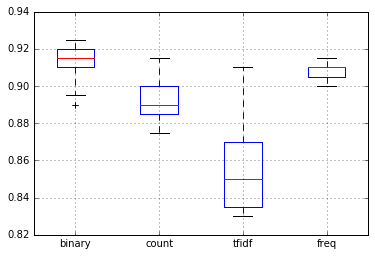

In [18]:
import matplotlib.pyplot as plt
results.boxplot()
plt.show()